$$
Chen Zihao \space915490404
$$

# STA 208: Homework 1 (Do not distribute)

## Due 4/18/2018 in class and online by 10am

__Instructions:__ To make grading easier for the TAs please print out your homework and also submit it on canvas.  The canvas should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand when you hand it in.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (20 pts)

Consider the binary classification setting where the training data is $x_i \in \mathbb R^p, y_i \in \{0,1\}, i=1,\ldots,n$ and recall the empirical risk (as a function of the predictor $g : \mathbb R^p \to \{0,1\}$),
$$
R_n(g) = \frac 1n \sum_{i=1}^n \ell(y_i, g(x_i)),
$$
and the true risk is 
$$
R(g) = \mathbb E \ell(Y,g(X))
$$
where $X,Y$ are drawn from their joint distribution $f_{X,Y}(x,y)$.

1. Suppose that the loss function is the Hamming loss, $\ell(y,\hat y) = 1\{ y \ne \hat y\}$.  What is the predictor that minimizes the True risk?  (Hint: derive an expression for this based on the joint distribution - you can use expressions involving conditional probabilities.)
2. The predictor above is called the Bayes rule.  For the Hamming loss, write an expression for the true risk of the Bayes rule, this is the irreducible error.
3. Suppose that we know that the Bayes rule can be written in the form, 
$$
h(x) = 1\{ x_j > 0 \}, 
$$
for some $j = 1,\ldots,p$, but we don't know which one.  Now using the empirical risk, what is a reasonable classification algorithm (Hint: you can think of finding a good classifier as a problem of finding $j$).  Describe the fit and predict methods. 
4. Suppose that I told you that for any fixed $g$ the following probability bound holds (from Hoeffding's inequality)
$$
\mathbb P \left\{ |R_n(g) - R(g)| > t \right\} \le 2 \exp \left( - 2 n t^2 \right).
$$
How many samples would I need to get a classifier $\hat g$, from the previous question, such that 
$$
\mathbb P \left\{ R(\hat g) < R(h) + 0.1 \right\} \ge 0.95.
$$
(Hint: use the union bound)

1.
$$
\begin{split}
R(g)&=\sum_{y=0}^1f_{Y|X}(y|x)\ell(y,\hat y)\\
\hat y &= \mathop{\arg\min}_{\hat y}\sum_{y=0}^1f_{Y|X}(y|x)\ell(y,\hat y)\\
\end{split}
$$
As the Hamming loss $\ell(y,\hat y)=1\{y\ne \hat y\}=(y-\hat y)^2$ as long as $\hat y\in \{0,1\}$ then we have
$$
\hat y = \mathop{\arg\min}_{\hat y}\sum_{y=0}^1f_{Y|X}(y|x)(y-\hat y)^2\\
$$
take the first derivative and set it to zero
$$
\begin{split}
0&=2\sum_{y=0}^1f_{Y|X}(y|x)(y-\hat y)\\
y^*&=E(y|x)=P(y=1|x)
\end{split}
$$

$y^*$ is a regressor for y and it is the conditional probability of y=1 given x.

so that the classifier is that 
$$
\hat y = 1\{P(y=1|x)>0.5\}
$$

2.

$$
\begin{split}
R(\hat y)&=\sum_{y=0}^1f_{Y|X}(y|x)\ell(y,\hat y)\\
&=\sum_{y=0}^1f_{Y|X}(y|x)|y-1\{P(y=1|x)>0.5\}|dy\\
&=P(y=0|x)\times 1\{P(y=1|x)>0.5\}+P(y=1|x)\times (1-1\{P(y=1|x)>0.5\})\\
&=P(y=0|x)\times 1\{P(y=1|x)>0.5\}+P(y=1|x)\times 1\{P(y=1|x)<0.5\}\\
\end{split}
$$

This is also the total probability of misclassification.

3.

The goal is to minimize the empirical risk.
$$
\min_j R_n(g) = \min_j \frac 1n \sum_{i=1}^n \ell(y_i, 1\{ x_{ij} > 0 \})
$$

where $x_{ij}$ is value of the jth variables of the ith object.

All we need is to calulate the empirical risk as shown above and find the minimum, then we can get the j. 

For the predict method, once we determined which j we use, $\hat y_i =1\{x_{ij}>0\}$ .

4.

 (from Hoeffding's inequality)
 
$$
\begin{split}
\mathbb P \left\{ |R_n(g) - R(g)| > t \right\} &\le 2 \exp \left( - 2 n t^2 \right).\\
\mathbb P \left\{ R_n(g) - R(g) > t \right\} +\mathbb P \left\{ R_n(g) - R(g) < -t \right\} &\le 2 \exp \left( - 2 n t^2 \right)\\
\mathbb P \left\{ R_n(g) - R(g) < -t \right\} &< 2 \exp \left( - 2 n t^2 \right)\\
\end{split}
$$

in order to get 

$$
\begin{split}
\mathbb P \left\{ R(\hat g) < R(h) + 0.1 \right\} &\ge 0.95\\
\mathbb P \left\{ R(h) - R_n(\hat g)+ R_n(\hat g) -  R(\hat g) > -0.1 \right\} &\ge 0.95\\
\mathbb P \left\{ R(h) - R_n(\hat g)< -0.05 \right\} +\mathbb P \left\{  R_n(\hat g) -  R(\hat g) < -0.05 \right\}&<\mathbb P \left\{ R(h) - R_n(g)+ R_n(g) -  R(\hat g) < -0.1 \right\} \le 0.05\\
\mathbb P \left\{  R_n(\hat g) -  R(\hat g) < -0.05 \right\}&< 0.05\\
\end{split}
$$

Compare with the Hoeffding's inequality, let $2\exp \left( - 2 n t^2 \right) = 0.05$ where t = 0.05

then $n = \frac {-\log 0.025}{2t^2}=\frac {-\log 0.025}{2*0.05^2}=737.78$

We need n = 738 to achieve the inequlity.

In [1]:
import math
-math.log(0.025)/(2*(0.05**2))

737.7758908227871

__Exercise 2__ (20 pts)

Consider the regression setting in which $x_i \in \mathbb R^p$ and $y_i \in \mathbb R$, for $i=1,\ldots,n$ and $p < n$.

1. For a given regressor, let $\hat y_i$ be prediction given $x_i$, and $\hat y$ be the vector form.  Show that both linear regression and k-nearest neighbors can be written in the form
$$
\hat y = H y,
$$
where $H$ is dependent on $X$ (the matrix of where each row is $x_i$).  Give a clear expression for $H$.
2. By modifying the matrix $H$, how can we ensure that a given sample is not used as a k nearest neighbor.  Derive an expression for the leave-one-out cross validated square error based on this.
3. For linear regression, let $X = U D V^\top$ be the singular value decomposition where $U$ is $n \times p$, and $V, D$ is $p \times p$ ($D$ is diagonal). Derive an expression for the OLS coefficients $\beta = A b$ such that $A$ is $p \times p$ and depends on $V$ and $D$, and $b$ is a $p$ vector and does not depend on $D$.  Describe a fit method that precomputes these quantities separately, and describe a predict method.
4. Consider a regressor that performs OLS using the SVD above, but every instance of D will only use the largest $r$ values on the diagonal (all others are set to 0).  Call this new matrix $D_r$ ($r < p$).  Given that you have computed $b$ already, how could you make a method `change_rank` that recomputes $A$ with $D_r$ instead of $D$?  What is its computational complexity (it should not depend on n)?

1.

For linear regression

$H=X(X^TX)^{-1}X^T$

For KNN

The entries of H is either 0 or 1/k. $H_{ij}=1/k$ if the $x_j$ is among the k-nearest neighbors of $x_i$

2.

If we want to know whether the ith sample is used for the k nearest neighbor, just check the ith collumn of H, if the ith collumn is all zero, then the ith sample is not used in the k nearest neighbor. 

let $H_k$ is the H matrix for k, then $\hat y^*=\frac {k+1} k(H_{k+1}-\frac 1 {k+1}I)y$ is the leave-one-out cross validated predictor. so that the square error is that 
$$
||y - \hat y^*||^2_2 = ||y-\frac {k+1} k(H_{k+1}-\frac 1 {k+1}I)y||^2_2=||(\frac {k+1} kI-\frac {k+1} kH_{k+1})y||^2_2=||\frac {k+1} k(I-H_{k+1})y||^2_2
$$
    

3.

$$
\hat \beta = (X^\top X)^{-1}X^\top Y= (VD^\top U^\top  U D V^\top)^{-1}(U D V^\top)^\top Y = VD^{-2}V^\top VD^\top U^\top Y=VD^{-1} U^\top Y
$$

let $A=VD^{-1}$ and $b=U^\top Y$ and we will get $\beta = Ab$

In [2]:
def fit(X,y):
    """
    : Computes beta using singular value regression
    """
    n,p = X.shape
    U,D,VT = svd(X)
    U = U[:,:p]
    D1 = np.diag(1/self.D)
    A = VT.T.dot(D1)
    b = U.T.dot(y)
    beta = A.dot(b)
    return beta

def predict(X_test,beta):
    """
    : Outputs the predicted y given the predictors X_test and beta
    """
    return X_test.dot(beta)

4.

$A_r=V_rD_r^{-1}$ where $V_r$ is a $p\times r$ matrix and it is a matrix of the first r columns of V, $D_r$ is a $r\times r$ matrix defined by the question.

$\beta = A_rb_r$ where $b_r$ is a vector of the first r elements in vector b

the computational complexity of $A_r$ is O($pr^3$)

the method is shown in the Exercise 3 below in the 'class' cell change_rank function.

__Exercise 3__ (30 pts)

We call the method that zeros out all but $r$ singular values in OLS, singular value regression.  Implement the singular value regressor as a sklearn style class below.  Test it by simulating the training and test data from the `gen_LR_data` function below and calculate the average square error on the test set.  Do this for each choice of `r` in the fit function.

In [3]:
import numpy as np
from scipy.linalg import svd

In [4]:
class SingularValueRegressor:
    """
    : A regression object that uses the SVD to fit and predict
    : Init: specify rank r
    : .fit: solve the SVD of X and precompute beta
    : .predict: Return y hat for X_test
    """
    
    def __init__(self,r):
        """
        : Store the rank
        """
        self.r = r
        
    def fit(self,X,y):
        """
        : Computes and stores the SVD (use scipy.linalg.svd)
        : Computes beta for rank r singular value regression
        """
        self.n,self.p = X.shape
        self.U,self.D,self.VT = svd(X)
        
        self.U = self.U[:,:self.p]
        self.b = self.U.T.dot(y)
        
        D1 = np.diag(1/self.D)[:self.r,:self.r]
        A = self.VT.T[:,:self.r].dot(D1)
        
        self.beta = A.dot(self.b[:self.r])
        return self.beta
        
    def predict(self,X_test):
        """
        : Outputs the predicted y given the predictors X_test
        """
        return X_test.dot(self.beta)
        
    def change_rank(self,r):
        """
        : Assumes that the SVD has been computed and uses it to change the rank; after
        : running the new regressor object should be as if we fit with the new rank r
        """
        self.r = r
        D1 = np.diag(1/self.D)[:self.r,:self.r]
        A = self.VT.T[:,:self.r].dot(D1)
        self.beta = A.dot(self.b[:self.r])
        return self.beta

In [5]:
def gen_LR_data(r = 10, p = 20, n = 100):
    """
    : generate data from an approx low rank regression model
    """
    alpha = np.random.chisquare(1,size = (p,r)) #X coefficients
    Z = np.random.normal(size=(n,r)) #X covariates
    beta = np.random.normal(size = r) #reg covs
    mu = Z @ beta #hidden mean
    Xmean = Z @ alpha.T #random transformation of Z
    X = Xmean + np.random.normal(0,.5,size=(n,p)) #add noise - not exactly low rank
    X_test = Xmean + np.random.normal(0,.5,size=(n,p))
    y = mu + np.random.normal(0,1,size=(n))
    y_test = mu + np.random.normal(0,1,size=(n))
    return (X,y,X_test,y_test)

In [6]:
X,y,X_test,y_test = gen_LR_data()

In [7]:
import pandas as pd
error = np.zeros([20,1000])
for i in range(1000):
        X,y,X_test,y_test = gen_LR_data()
        model = SingularValueRegressor(1)
        model.fit(X,y)
        y_hat = model.predict(X_test)
        error[0,i] = sum((y_hat-y_test)**2)
        for r in range(2,21):
                model.change_rank(r)
                y_hat = model.predict(X_test)
                error[r-1,i]= sum((y_hat-y_test)**2)

#show the error in a much more pretty way                
Error = pd.DataFrame([range(1,21),np.mean(error,axis=1)]).T
Error.columns = ["r","average square error"]
Error

,r,average square error
0,1.0,954.749412
1,2.0,847.364155
2,3.0,742.872949
3,4.0,643.905625
4,5.0,546.042764
5,6.0,454.114549
6,7.0,366.711013
7,8.0,275.403467
8,9.0,204.715437
9,10.0,131.004217


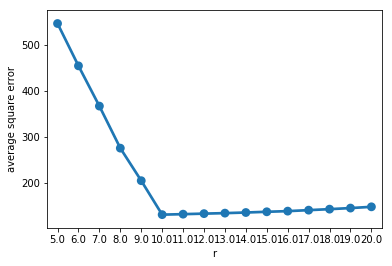

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pointplot(x="r",y="average square error",data=Error.iloc[4:,:])
plt.show()

__Exercise 4__ (30 pts)

The dataset in the hw1 directory has a Y variable, 7 predictor variables (X1 - X7).  Using sklearn and the class that you constructed above, compare ridge regression, OLS, kNN, and SVRegression.  Compare and tune the methods using appropriate cross validation.  Comment on the tuning of each parameter in ridge, kNN, and SVRegression in markdown.  Be sure to standardize the X variables first and decide how to deal with NAs.  Feel free to use the LOO method from lab 1.

In [9]:
import pandas as pd

In [10]:
data_mat = pd.read_csv('hw1_data.csv')
data_mat.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [11]:
data_mat.describe()

,Y,X1,X2,X3,X4,X5,X6,X7
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


the X7 seems to be a catagories variable.

In [12]:
data_mat.isnull().any()

Y     False
X1    False
X2    False
X3     True
X4    False
X5    False
X6    False
X7    False
dtype: bool

As shown above the X3 variables have some missing data.

In [13]:
df = data_mat.copy()#in case we did something wrong

#use the collumn mean to replace the missing value in the data.
df = df.fillna(df.mean())

#standardize the X variables (X1 to X6)
df_new = df.iloc[:,1:-1].apply(lambda x: (x-np.mean(x))/np.std(x,ddof=1))

# get the dummy variables for X7
dummies = pd.get_dummies(df['X7'])

y = np.array(df.Y)
X = np.array(pd.concat([df_new,dummies],axis=1))

In [14]:
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model, neighbors
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV

In [15]:
# copy the loo_risk from lab1
def loo_risk(X,y,regmod):
    """
    Construct the leave-one-out square error risk for a regression model
    
    Input: design matrix, X, response vector, y, a regression model, regmod
    Output: scalar LOO risk
    """
    loo = LeaveOneOut()
    loo_losses = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        regmod.fit(X_train,y_train)
        y_hat = regmod.predict(X_test)
        loss = np.sum((y_hat - y_test)**2)
        loo_losses.append(loss)
    return np.mean(loo_losses)

Compare ridge regression, OLS, kNN, and SVRegression. Compare and tune the methods using appropriate cross validation. Comment on the tuning of each parameter in ridge, kNN, and SVRegression in markdown. 

## OLS

In [16]:
lin1 = linear_model.LinearRegression(fit_intercept=False)
loo_risk(X,y,lin1)

11.303736242894026

## Ridge Regression

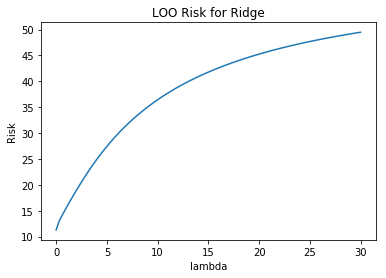

In [17]:
alphas = np.linspace(0.001,30,100)
rcv = RidgeCV(alphas = alphas, store_cv_values=True,normalize=True)
rcv.fit(X,y)
cv_vals = rcv.cv_values_
LOOr = cv_vals.mean(axis=0)

plt.plot(alphas,LOOr)
plt.xlabel('lambda')
plt.ylabel('Risk')
plt.title('LOO Risk for Ridge');
plt.show()

In [18]:
LOOr 

array([ 11.29827261,  13.03923239,  14.18743817,  15.26679173,
        16.32012344,  17.35395526,  18.36790877,  19.35988211,
        20.32762998,  21.26929818,  22.18356491,  23.06962676,
        23.92712846,  24.75607895,  25.55677143,  26.32971386,
        27.07557136,  27.79511981,  28.4892092 ,  29.15873503,
        29.80461639,  30.42777925,  31.02914394,  31.60961593,
        32.17007918,  32.7113914 ,  33.23438095,  33.73984482,
        34.22854759,  34.70122102,  35.15856415,  35.6012438 ,
        36.02989533,  36.4451236 ,  36.84750403,  37.2375838 ,
        37.61588302,  37.98289599,  38.33909243,  38.68491868,
        39.02079891,  39.34713621,  39.66431376,  39.97269587,
        40.27262897,  40.56444262,  40.84845037,  41.12495068,
        41.39422774,  41.6565522 ,  41.91218198,  42.1613629 ,
        42.40432937,  42.64130498,  42.87250313,  43.09812751,
        43.31837267,  43.5334245 ,  43.74346064,  43.94865097,
        44.14915799,  44.34513718,  44.5367374 ,  44.72

In [19]:
LOOs = list(LOOr)
print("The minimum LOO Risk for Ridge method is %s when lambda = %s "% (min(LOOs),alphas[LOOs.index(min(LOOs))]))

The minimum LOO Risk for Ridge method is 11.2982726081 when lambda = 0.001 


the mimimum point is about $\lambda=0$ which means multicollinearity is not present.The OLS is good enough, we did not need to use the Ridge Regression.

## kNN

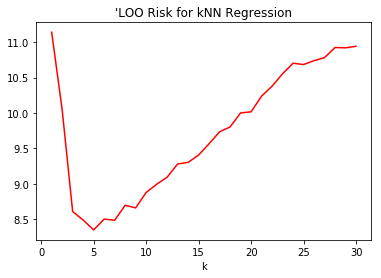

In [20]:
LOOs = []
K=30
Ks = range(1,K+1)
for k in Ks:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    LOOs.append(loo_risk(X,y,knn))

plt.plot(Ks,LOOs,'r',label="LOO risk")
plt.title("'LOO Risk for kNN Regression")
_ = plt.xlabel('k')
plt.show()

In [21]:
print("The minimum LOO Risk for KNN method is %s when k = %s "% (min(LOOs),LOOs.index(min(LOOs))+1))

The minimum LOO Risk for KNN method is 8.35201909548 when k = 5 


From the graph and output above, when k = 5, the LOO Risk is the smallest. We will choose k=5 for the KNN method and the LOO Risk is 8.35.

## SVRegression

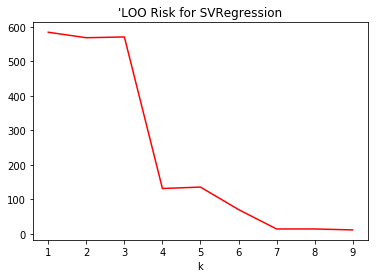

In [22]:
LOOs = []
K=X.shape[1]
Ks = range(1,K+1)
for k in Ks:
    knn = SingularValueRegressor(k)
    LOOs.append(loo_risk(X,y,knn))

plt.plot(Ks,LOOs,'r',label="LOO risk")
plt.title("'LOO Risk for SVRegression")
_ = plt.xlabel('k')
plt.show()

In [23]:
print("The minimum LOO Risk for SVRegression  is %s when k = %s "% (min(LOOs),LOOs.index(min(LOOs))+1))

The minimum LOO Risk for SVRegression  is 11.3037362429 when k = 9 


As we can see above, when k =7 the LOO Risk is almost as the lowest. The best situation is taking k=9.

## Conclusion

To sum up, kNN is the best with the lowest LOO risk which is about 8.35. The risk of OLS is the same as SVR when taking k=9 which is because SVR and the OLS is about the same (except the computing error) when k=9 in this case .